In [1]:
!pip install -q tensorflow-gpu==2.0.0-beta1

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1


In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.15.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1548 - accuracy: 0.9521 - val_loss: 0.0603 - val_accuracy: 0.9803
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0309 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0423 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0347 - val_accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0314 - val_accuracy: 0.9912


In [11]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)


313/313 [==============================] - 2s 6ms/step


In [12]:
classes=[0,1,2,3,4,5,6,7,8,9]

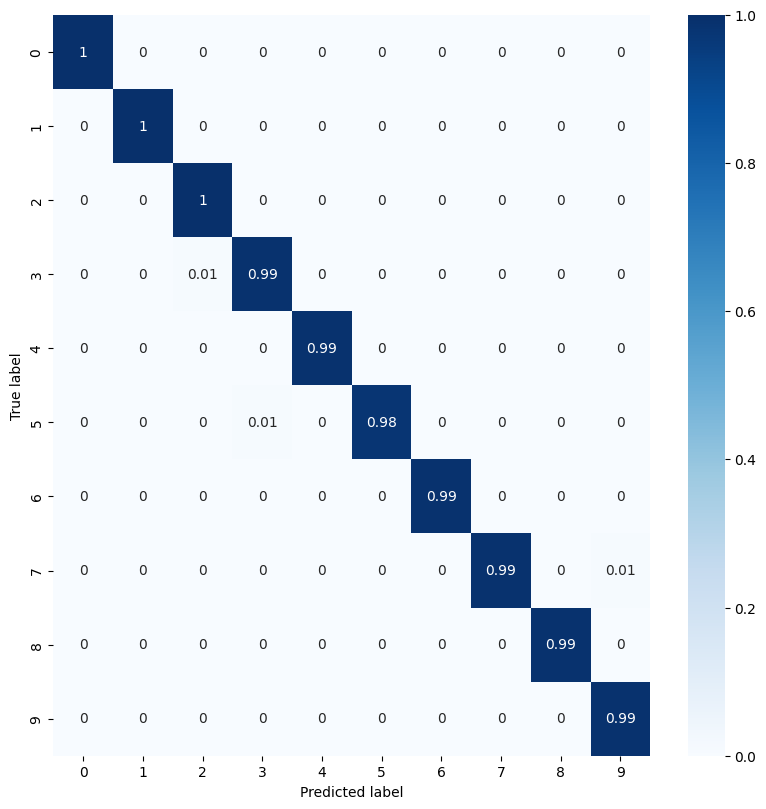

In [13]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

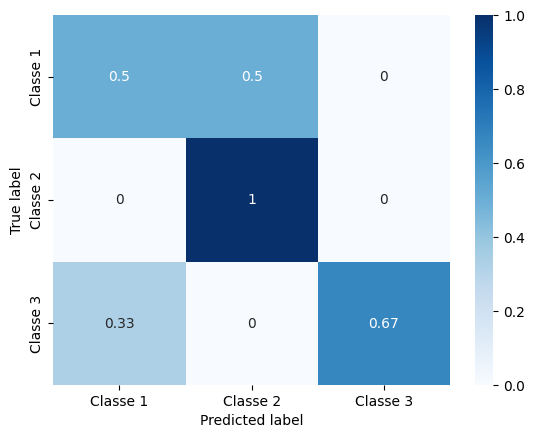

Métricas para Classe 1:
  Sensibilidade: 0.50
  Especificidade: 0.80
  Acurácia: 0.71
  Precisão: 0.50
  F-Score: 0.50

Métricas para Classe 2:
  Sensibilidade: 1.00
  Especificidade: 0.80
  Acurácia: 0.86
  Precisão: 0.67
  F-Score: 0.80

Métricas para Classe 3:
  Sensibilidade: 0.67
  Especificidade: 1.00
  Acurácia: 0.86
  Precisão: 1.00
  F-Score: 0.80



In [23]:
# Geração da matriz de confusão
y_true = [0, 0, 1, 1, 2, 2, 2]  # Exemplos de rótulos verdadeiros
y_pred = [0, 1, 1, 1, 2, 0, 2]  # Exemplos de previsões do modelo
classes = ['Classe 1', 'Classe 2', 'Classe 3']  # Classes da base de dados

# Matriz de confusão
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

# Normalização da matriz de confusão
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, None], decimals=2)

# Exibição da matriz de confusão
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Cálculo das métricas
def calculate_metrics(con_mat):
    metrics = []
    total = np.sum(con_mat)

    for i in range(len(con_mat)):  # Para cada classe na matriz de confusão
        VP = con_mat[i, i]
        FN = np.sum(con_mat[i, :]) - VP
        FP = np.sum(con_mat[:, i]) - VP
        VN = total - (VP + FN + FP)

        sensibilidade = VP / (VP + FN) if (VP + FN) > 0 else 0
        especificidade = VN / (FP + VN) if (FP + VN) > 0 else 0
        acuracia = (VP + VN) / total
        precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
        f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

        metrics.append({
            'Classe': classes[i],
            'Sensibilidade': sensibilidade,
            'Especificidade': especificidade,
            'Acurácia': acuracia,
            'Precisão': precisao,
            'F-Score': f_score
        })

    return metrics

# Calcula e exibe as métricas para cada classe
metrics = calculate_metrics(con_mat)
for metric in metrics:
    print(f"Métricas para {metric['Classe']}:")
    print(f"  Sensibilidade: {metric['Sensibilidade']:.2f}")
    print(f"  Especificidade: {metric['Especificidade']:.2f}")
    print(f"  Acurácia: {metric['Acurácia']:.2f}")
    print(f"  Precisão: {metric['Precisão']:.2f}")
    print(f"  F-Score: {metric['F-Score']:.2f}")
    print()



Tabela de Métricas:
     Classe  Sensibilidade  Especificidade  Acurácia  Precisão  F-Score
0  Classe 1       0.500000             0.8  0.714286  0.500000      0.5
1  Classe 2       1.000000             0.8  0.857143  0.666667      0.8
2  Classe 3       0.666667             1.0  0.857143  1.000000      0.8


,Classe,Sensibilidade,Especificidade,Acurácia,Precisão,F-Score
0,Classe 1,0.500000,0.8,0.714286,0.500000,0.5
1,Classe 2,1.000000,0.8,0.857143,0.666667,0.8
2,Classe 3,0.666667,1.0,0.857143,1.000000,0.8


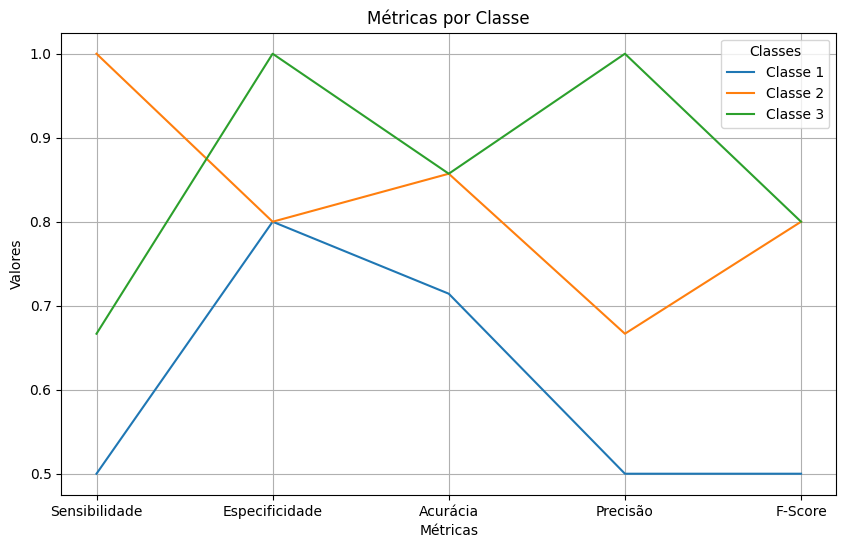

In [26]:
# Dados de exemplo
y_true = [0, 0, 1, 1, 2, 2, 2]  # Exemplos de rótulos verdadeiros
y_pred = [0, 1, 1, 1, 2, 0, 2]  # Exemplos de previsões do modelo
classes = ['Classe 1', 'Classe 2', 'Classe 3']  # Classes da base de dados

# Matriz de confusão
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

# Função para calcular as métricas
def calculate_metrics(con_mat):
    metrics = []
    total = np.sum(con_mat)

    for i in range(len(con_mat)):  # Para cada classe na matriz de confusão
        VP = con_mat[i, i]
        FN = np.sum(con_mat[i, :]) - VP
        FP = np.sum(con_mat[:, i]) - VP
        VN = total - (VP + FN + FP)

        sensibilidade = VP / (VP + FN) if (VP + FN) > 0 else 0
        especificidade = VN / (FP + VN) if (FP + VN) > 0 else 0
        acuracia = (VP + VN) / total
        precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
        f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

        metrics.append({
            'Classe': classes[i],
            'Sensibilidade': sensibilidade,
            'Especificidade': especificidade,
            'Acurácia': acuracia,
            'Precisão': precisao,
            'F-Score': f_score
        })

    return metrics

# Calcula as métricas para cada classe
metrics = calculate_metrics(con_mat)

# Cria um DataFrame para exibir as métricas
metrics_df = pd.DataFrame(metrics)

# Exibe a tabela com as métricas
print("\nTabela de Métricas:")
print(metrics_df)

# Exibe a tabela no formato de grade (se usado no Jupyter/Colab)
from IPython.display import display

display(metrics_df)

# Gera o gráfico de linhas com as métricas por classe
plt.figure(figsize=(10, 6))
for classe in metrics_df['Classe']:
    plt.plot(metrics_df.columns[1:], metrics_df.loc[metrics_df['Classe'] == classe].values[0][1:], label=classe)

plt.title('Métricas por Classe')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.legend(title="Classes")
plt.grid(True)
plt.show()